In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
# FUNCTION DEFINITIONS (GRAYSCALE IMAGE TRANSFORM)

def img_to_gray(file_name):
    '''Converts an image file to a grayscale image'''
    image = Image.open(file_name)
    image_in = image.convert('L')
    return image_in

def img_to_arr(grayed_image):
    """Converts an image (grayed or not) into an array"""
    if type(grayed_image) == str: grayed_image = img_to_gray(grayed_image)
    arr = np.asarray(grayed_image)
#     return arr.flatten
    return arr

def plot_hist(arr, bins=256):
    """Plots a histogram"""
    plt.hist(arr, bins=bins)

def plot_graph(arr):
    """Plots a graph"""
    plt.plot(arr)

def count_hist_values(arr):
    """Sums the count of pixels per sensitivity"""
    count_arr = np.zeros(256)
    for each in arr: count_arr[each] += 1
    return count_arr

def iter_array(arr):
    """Sums the successive count"""
    next_val = iter(arr)
    myList = [next(next_val)]
    for each in next_val:
        myList.append(each + myList[-1])
    myArr = np.array(myList)
    return myArr

def iter_result(file_name):
    """Result of iter_array on picture"""
    result = iter_array(count_hist_values(img_to_arr(file_name).flatten()))
    return result

def normalize_res(arr):
    """Values between 0 and 255 for image processing"""
    sensitivity = 255 * (arr - arr.min())
    arr = (sensitivity / (arr.max() - arr.min())).astype('uint8')
    return arr

def equalize(arr, file_name):
    """Create new image from old"""
    equalized = arr[img_to_arr(file_name).flatten()]
    return equalized

def original(file_name):
    """Showcase original"""
    image1 = img_to_arr(file_name)
    return Image.fromarray(image1)

def final(file_name):
    """Showcase results"""
    image1 = img_to_arr(file_name)
    image2 = equalize(arr=normalize_res((iter_result(file_name))),
                      file_name=file_name)
#     return image2
    image2 = np.reshape(image2, image1.shape)
#     return image1, image2
    return Image.fromarray(image2)

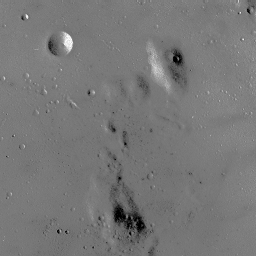

In [3]:
original('moon.bmp')

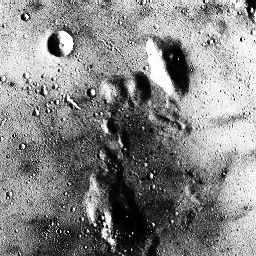

In [4]:
final('moon.bmp')

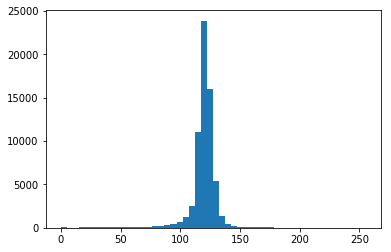

In [11]:
moon = img_to_arr('moon.bmp').flatten()
plot_hist(moon, 50)

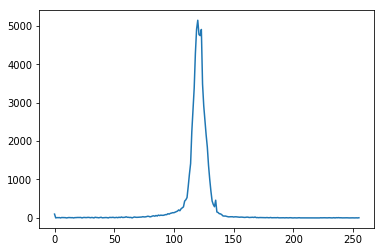

In [6]:
plot_graph(count_hist_values(moon))

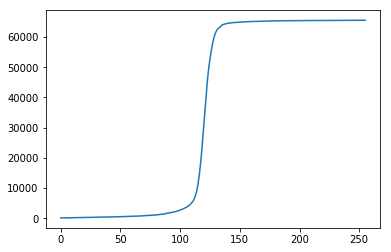

In [7]:
plot_graph(iter_result('moon.bmp'))

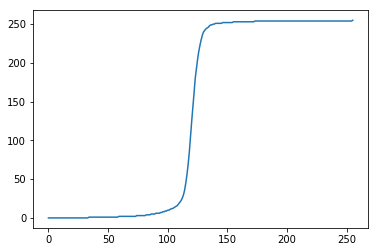

In [8]:
plot_graph(normalize_res(iter_result('moon.bmp')))

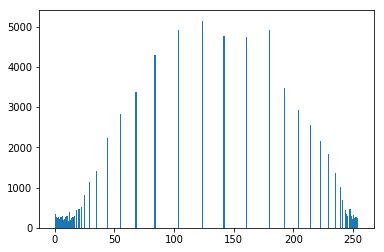

In [9]:
plot_hist(arr=equalize(normalize_res(iter_result('moon.bmp')), 'moon.bmp'))